# Exploratory Data Analysis Starter

## Import packages

In [58]:

import pandas as pd

# used for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

---

## Loading data with Pandas

We need to load `client_data.csv` and `price_data.csv` into individual dataframes so that we can work with them in Python. For this notebook and all further notebooks, it will be assumed that the CSV files will the placed in the same file location as the notebook. If they are not, please adjust the directory within the `read_csv` method accordingly.

In [59]:
client_df = pd.read_csv('./client_data.csv')
price_df = pd.read_csv('./price_data.csv')

You can view the first 3 rows of a dataframe using the `head` method. Similarly, if you wanted to see the last 3, you can use `tail(3)`

In [60]:
client_df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0


In [61]:
client_df.tail(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
14603,10e6828ddd62cbcf687cb74928c4c2d2,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,2012-02-08,2015-02-09,190.39,...,f,18.05,39.84,39.84,1,20.38,4,lxidpiddsbxsbosboudacockeimpuepw,15.935,1
14604,1cf20fd6206d7678d5bcafd28c53b4db,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,2012-08-30,2015-08-31,19.34,...,f,0.00,13.08,13.08,1,0.96,3,lxidpiddsbxsbosboudacockeimpuepw,11.000,0
14605,563dde550fd624d7352f3de77c0cdfcd,MISSING,8730,0,0,2009-12-18,2016-12-17,2009-12-18,2015-12-21,762.41,...,f,0.00,11.84,11.84,1,96.34,6,ldkssxwpmemidmecebumciepifcamkci,10.392,0


In [62]:
price_df.head(3)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0


---

## Descriptive statistics of data

### Data types

It is useful to first understand the data that you're dealing with along with the data types of each column. The data types may dictate how you transform and engineer features.

To get an overview of the data types within a data frame, use the `info()` method.

In [63]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [64]:
# converting date columns of client df from object/str to date tiem object
dates = ['date_activ','date_end','date_modif_prod','date_renewal']
for i in dates:
    client_df[i] = pd.to_datetime(client_df[i])
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              14606 non-null  object        
 1   channel_sales                   14606 non-null  object        
 2   cons_12m                        14606 non-null  int64         
 3   cons_gas_12m                    14606 non-null  int64         
 4   cons_last_month                 14606 non-null  int64         
 5   date_activ                      14606 non-null  datetime64[ns]
 6   date_end                        14606 non-null  datetime64[ns]
 7   date_modif_prod                 14606 non-null  datetime64[ns]
 8   date_renewal                    14606 non-null  datetime64[ns]
 9   forecast_cons_12m               14606 non-null  float64       
 10  forecast_cons_year              14606 non-null  int64         
 11  fo

In [65]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [66]:
# converting date columns of price df to date time objects
price_df['price_date'] = pd.to_datetime(price_df['price_date'])
price_df['month'] = pd.to_datetime(price_df['price_date']).dt.month

### Statistics

Now let's look at some statistics about the datasets. We can do this by using the `describe()` method.

In [67]:
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [68]:
# unique values in each column gives us the distinctiveness of data, amking our analysis more powerful
for col_name, data in client_df.iteritems():
    print(f"Unique value count of {col_name}:", data.nunique())

Unique value count of id: 14606
Unique value count of channel_sales: 8
Unique value count of cons_12m: 11065
Unique value count of cons_gas_12m: 2112
Unique value count of cons_last_month: 4751
Unique value count of date_activ: 1796
Unique value count of date_end: 368
Unique value count of date_modif_prod: 2129
Unique value count of date_renewal: 386
Unique value count of forecast_cons_12m: 13993
Unique value count of forecast_cons_year: 4218
Unique value count of forecast_discount_energy: 12
Unique value count of forecast_meter_rent_12m: 3528
Unique value count of forecast_price_energy_off_peak: 516
Unique value count of forecast_price_energy_peak: 329
Unique value count of forecast_price_pow_off_peak: 41
Unique value count of has_gas: 2
Unique value count of imp_cons: 7752
Unique value count of margin_gross_pow_ele: 2391
Unique value count of margin_net_pow_ele: 2391
Unique value count of nb_prod_act: 10
Unique value count of net_margin: 11965
Unique value count of num_years_antig: 1

C:\Users\BharathRajPragada\AppData\Local\Temp\ipykernel_80944\1054913194.py:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, data in client_df.iteritems():


In [69]:
price_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,month
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984,6.501161
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592,3.451935
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000,4.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000,7.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389,10.000000
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221,12.000000


In [70]:
for col_name, data in price_df.iteritems():
    print(f"Unique value count of {col_name}:", data.nunique())

C:\Users\BharathRajPragada\AppData\Local\Temp\ipykernel_80944\1310725265.py:1: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, data in price_df.iteritems():


Unique value count of id: 16096
Unique value count of price_date: 12
Unique value count of price_off_peak_var: 1853
Unique value count of price_peak_var: 1189
Unique value count of price_mid_peak_var: 711
Unique value count of price_off_peak_fix: 66
Unique value count of price_peak_fix: 31
Unique value count of price_mid_peak_fix: 28
Unique value count of month: 12


---

## Data visualization

If you're working in Python, two of the most popular packages for visualization are `matplotlib` and `seaborn`. We highly recommend you use these, or at least be familiar with them because they are ubiquitous!

Below are some functions that you can use to get started with visualizations. 

In [71]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

Thhe first function `plot_stacked_bars` is used to plot a stacked bar chart. An example of how you could use this is shown below:

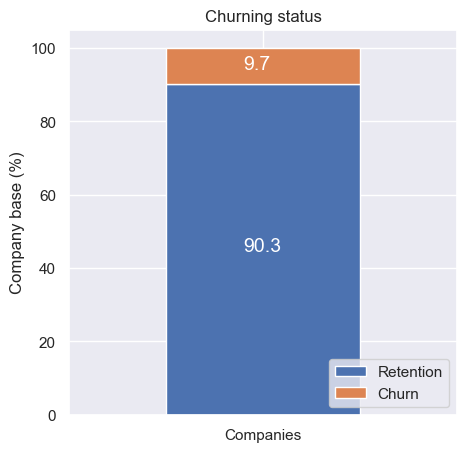

In [72]:
churn = client_df[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_="lower right")

The second function `annotate_bars` is used by the first function, but the third function `plot_distribution` helps you to plot the distribution of a numeric column. An example of how it can be used is given below:

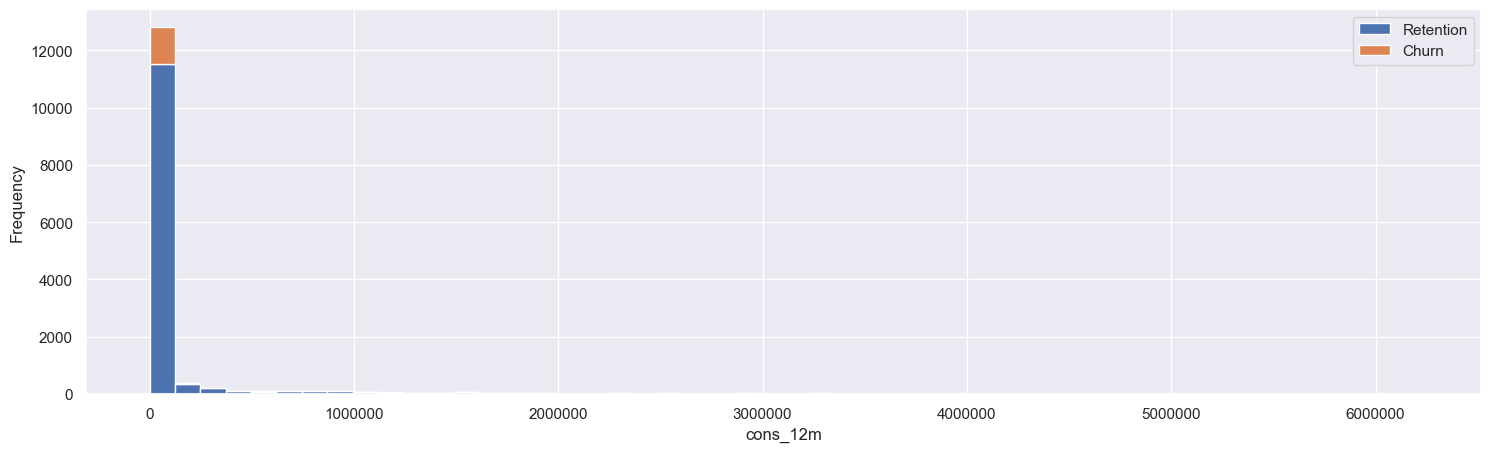

In [73]:
consumption = client_df[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

fig, axs = plt.subplots(nrows=1, figsize=(18, 5))


plot_distribution(consumption, 'cons_12m', axs)

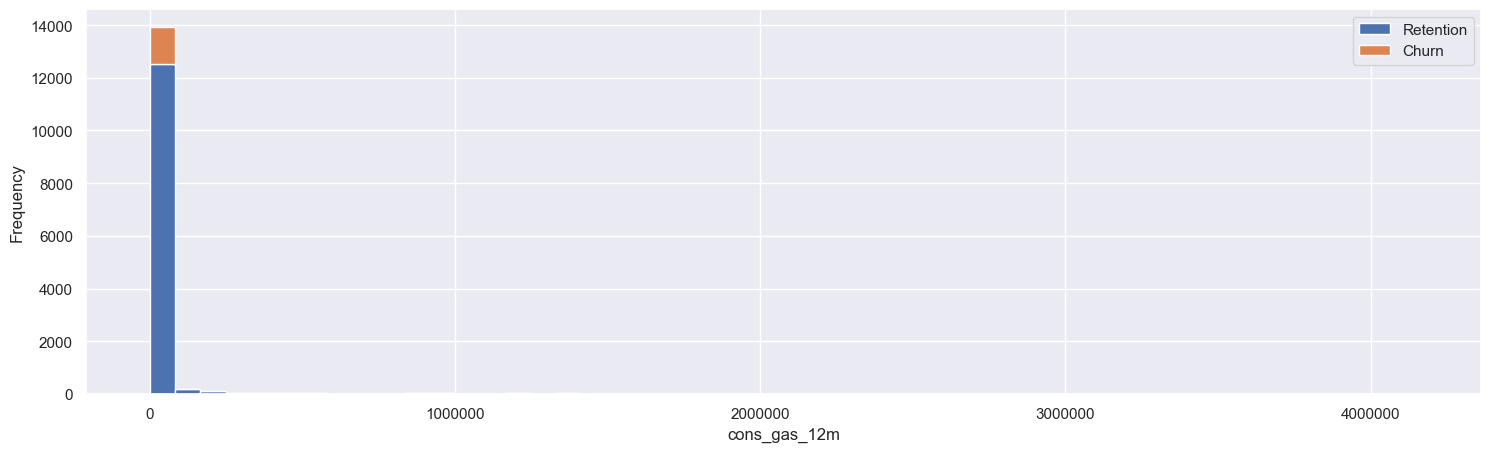

In [74]:
consumption = client_df[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

fig, axs = plt.subplots(nrows=1, figsize=(18, 5))


plot_distribution(consumption, 'cons_gas_12m', axs)

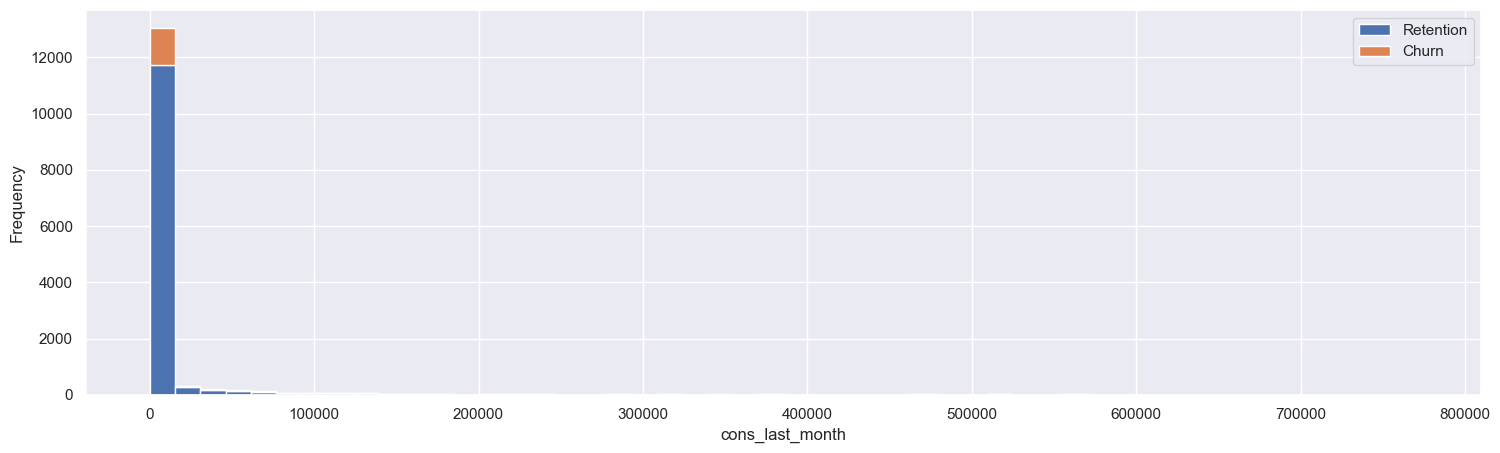

In [75]:
consumption = client_df[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

fig, axs = plt.subplots(nrows=1, figsize=(18, 5))


plot_distribution(consumption, 'cons_last_month', axs)

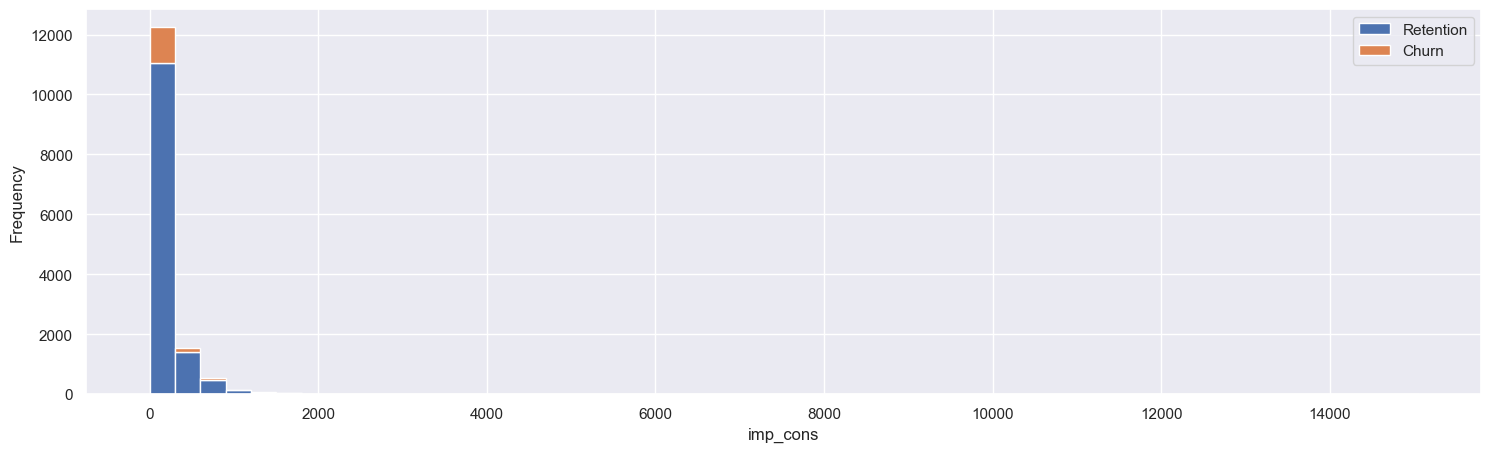

In [76]:
consumption = client_df[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

fig, axs = plt.subplots(nrows=1, figsize=(18, 5))


plot_distribution(consumption, 'imp_cons', axs)

In [77]:
grouped_df

,price_date,churn,price_mid_peak_fix
0,2015-01-01,0.0,6.027282
1,2015-01-01,1.0,7.218095
2,2015-02-01,0.0,6.017572
3,2015-02-01,1.0,7.206425
4,2015-03-01,0.0,5.997856
5,2015-03-01,1.0,7.213038
6,2015-04-01,0.0,5.994807
7,2015-04-01,1.0,7.176232
8,2015-05-01,0.0,5.968979
9,2015-05-01,1.0,7.136331


### Inference : Not all clients in the client data are available in the price data

In [78]:
# merging the data taking 'id' as a primary key from client_data and prie_data
merged_data = pd.merge(client_df, price_df, on='id', how='right')

# Display the merged DataFrame
merged_data.head(15)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,pow_max,churn,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,month
0,038af19179925da21a25619c5a24b745,foosdfpfkusacimwkcsosbicdxkicaua,3576.0,0.0,630.0,2013-06-03,2016-06-03,2015-04-29,2015-06-14,531.5,...,13.2,0.0,2015-01-01,0.151367,0.000000,0.000000,44.266931,0.000000,0.000000,1
1,038af19179925da21a25619c5a24b745,foosdfpfkusacimwkcsosbicdxkicaua,3576.0,0.0,630.0,2013-06-03,2016-06-03,2015-04-29,2015-06-14,531.5,...,13.2,0.0,2015-02-01,0.151367,0.000000,0.000000,44.266931,0.000000,0.000000,2
2,038af19179925da21a25619c5a24b745,foosdfpfkusacimwkcsosbicdxkicaua,3576.0,0.0,630.0,2013-06-03,2016-06-03,2015-04-29,2015-06-14,531.5,...,13.2,0.0,2015-03-01,0.151367,0.000000,0.000000,44.266931,0.000000,0.000000,3
3,038af19179925da21a25619c5a24b745,foosdfpfkusacimwkcsosbicdxkicaua,3576.0,0.0,630.0,2013-06-03,2016-06-03,2015-04-29,2015-06-14,531.5,...,13.2,0.0,2015-04-01,0.149626,0.000000,0.000000,44.266931,0.000000,0.000000,4
4,038af19179925da21a25619c5a24b745,foosdfpfkusacimwkcsosbicdxkicaua,3576.0,0.0,630.0,2013-06-03,2016-06-03,2015-04-29,2015-06-14,531.5,...,13.2,0.0,2015-05-01,0.149626,0.000000,0.000000,44.266931,0.000000,0.000000,5
5,038af19179925da21a25619c5a24b745,foosdfpfkusacimwkcsosbicdxkicaua,3576.0,0.0,630.0,2013-06-03,2016-06-03,2015-04-29,2015-06-14,531.5,...,13.2,0.0,2015-06-01,0.149626,0.000000,0.000000,44.266930,0.000000,0.000000,6
6,038af19179925da21a25619c5a24b745,foosdfpfkusacimwkcsosbicdxkicaua,3576.0,0.0,630.0,2013-06-03,2016-06-03,2015-04-29,2015-06-14,531.5,...,13.2,0.0,2015-07-01,0.150321,0.000000,0.000000,44.444710,0.000000,0.000000,7
7,038af19179925da21a25619c5a24b745,foosdfpfkusacimwkcsosbicdxkicaua,3576.0,0.0,630.0,2013-06-03,2016-06-03,2015-04-29,2015-06-14,531.5,...,13.2,0.0,2015-08-01,0.145859,0.000000,0.000000,44.444710,0.000000,0.000000,8
8,038af19179925da21a25619c5a24b745,foosdfpfkusacimwkcsosbicdxkicaua,3576.0,0.0,630.0,2013-06-03,2016-06-03,2015-04-29,2015-06-14,531.5,...,13.2,0.0,2015-09-01,0.145859,0.000000,0.000000,44.444710,0.000000,0.000000,9
9,038af19179925da21a25619c5a24b745,foosdfpfkusacimwkcsosbicdxkicaua,3576.0,0.0,630.0,2013-06-03,2016-06-03,2015-04-29,2015-06-14,531.5,...,13.2,0.0,2015-10-01,0.145859,0.000000,0.000000,44.444710,0.000000,0.000000,10


In [79]:
merged_data.shape

(193002, 34)

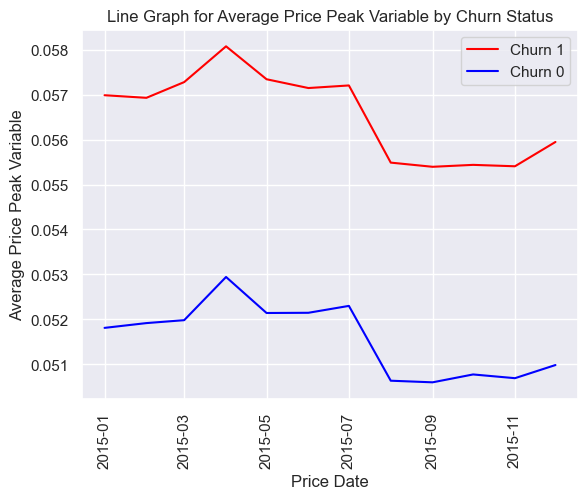

In [80]:
import pandas as pd
import matplotlib.pyplot as plt



# Group by 'price_date' and calculate the mean for 'price_peak_var'
grouped_df = merged_data.groupby(['price_date', 'churn'])['price_peak_var'].mean().reset_index()

# Filter the grouped DataFrame for churn 1 and 0
grouped_churn_1_df = grouped_df[grouped_df['churn'] == 1]
grouped_churn_0_df = grouped_df[grouped_df['churn'] == 0]

# Plotting line graph for 'price_peak_var'
plt.plot(grouped_churn_1_df['price_date'], grouped_churn_1_df['price_peak_var'], label='Churn 1', color='red')
plt.plot(grouped_churn_0_df['price_date'], grouped_churn_0_df['price_peak_var'], label='Churn 0', color='blue')

plt.xlabel('Price Date')
plt.ylabel('Average Price Peak for Energy')
plt.title('Line Graph for Average Price Peak for Energy by Churn Status')
plt.legend()
plt.xticks(rotation=90)
plt.show()

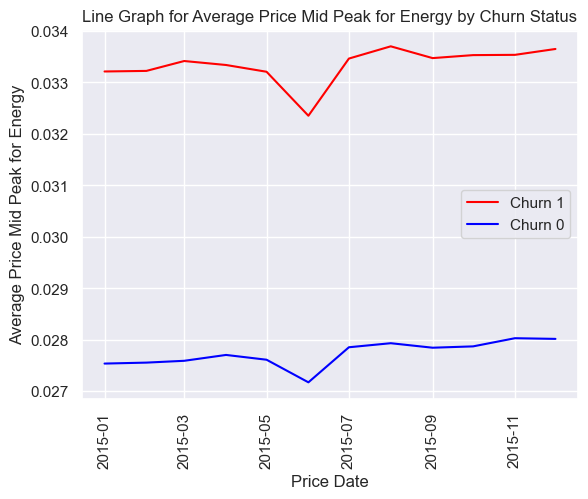

In [87]:
import pandas as pd
import matplotlib.pyplot as plt



# Group by 'price_date' and calculate the mean for 'price_mid_peak_var'
grouped_df = merged_data.groupby(['price_date', 'churn'])['price_mid_peak_var'].mean().reset_index()

# Filter the grouped DataFrame for churn 1 and 0
grouped_churn_1_df = grouped_df[grouped_df['churn'] == 1]
grouped_churn_0_df = grouped_df[grouped_df['churn'] == 0]

# Plotting line graph for 'price_mid_peak_var' after aggregation
plt.plot(grouped_churn_1_df['price_date'], grouped_churn_1_df['price_mid_peak_var'], label='Churn 1', color='red')
plt.plot(grouped_churn_0_df['price_date'], grouped_churn_0_df['price_mid_peak_var'], label='Churn 0', color='blue')

plt.xlabel('Price Date')
plt.ylabel('Average Price Mid Peak for Energy')
plt.title('Line Graph for Average Price Mid Peak for Energy by Churn Status')
plt.legend()
plt.xticks(rotation=90)
plt.show()

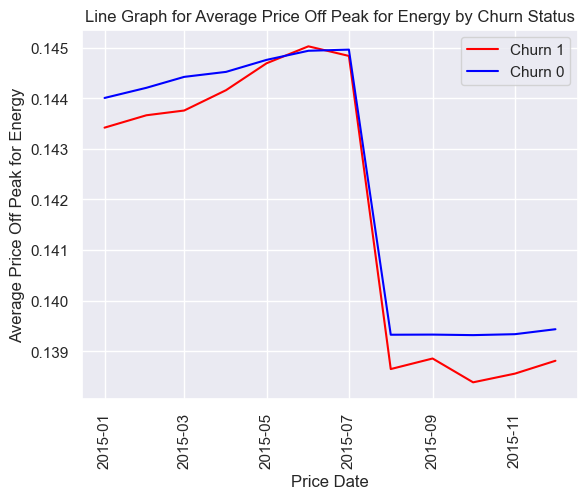

In [88]:
import pandas as pd
import matplotlib.pyplot as plt


# Group by 'price_date' and calculate the mean for 'price_peak_var'
grouped_df = merged_data.groupby(['price_date', 'churn'])['price_off_peak_var'].mean().reset_index()

# Filter the grouped DataFrame for churn 1 and 0
grouped_churn_1_df = grouped_df[grouped_df['churn'] == 1]
grouped_churn_0_df = grouped_df[grouped_df['churn'] == 0]

# Plotting line graph for 'price_peak_var' after aggregation
plt.plot(grouped_churn_1_df['price_date'], grouped_churn_1_df['price_off_peak_var'], label='Churn 1', color='red')
plt.plot(grouped_churn_0_df['price_date'], grouped_churn_0_df['price_off_peak_var'], label='Churn 0', color='blue')

plt.xlabel('Price Date')
plt.ylabel('Average Price Off Peak for Energy')
plt.title('Line Graph for Average Price Off Peak for Energy by Churn Status')
plt.legend()
plt.xticks(rotation=90)
plt.show()

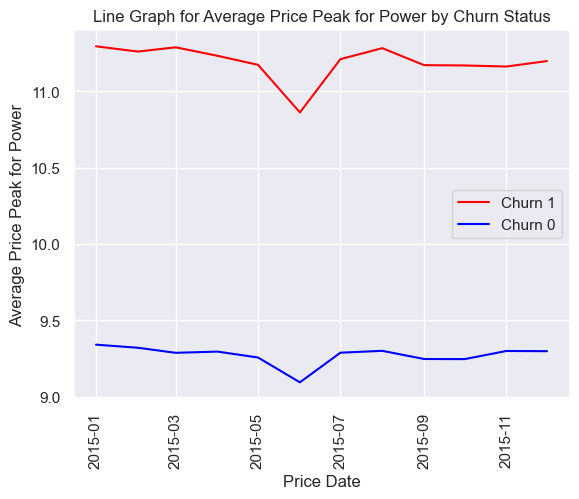

In [89]:
import pandas as pd
import matplotlib.pyplot as plt


# Group by 'price_date' and calculate the mean for 'price_peak_fix'
grouped_df = merged_data.groupby(['price_date', 'churn'])['price_peak_fix'].mean().reset_index()

# Filter the grouped DataFrame for churn 1 and 0
grouped_churn_1_df = grouped_df[grouped_df['churn'] == 1]
grouped_churn_0_df = grouped_df[grouped_df['churn'] == 0]

# Plotting line graph for 'price_peak_fix' after aggregation
plt.plot(grouped_churn_1_df['price_date'], grouped_churn_1_df['price_peak_fix'], label='Churn 1', color='red')
plt.plot(grouped_churn_0_df['price_date'], grouped_churn_0_df['price_peak_fix'], label='Churn 0', color='blue')

plt.xlabel('Price Date')
plt.ylabel('Average Price Peak for Power')
plt.title('Line Graph for Average Price Peak for Power by Churn Status')
plt.legend()
plt.xticks(rotation=90)
plt.show()

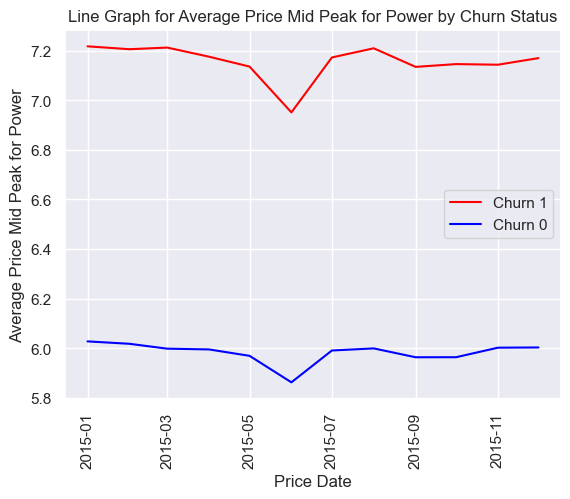

In [90]:
import pandas as pd
import matplotlib.pyplot as plt



# Group by 'price_date' and calculate the mean for 'price_mid_peak_fix'
grouped_df = merged_data.groupby(['price_date', 'churn'])['price_mid_peak_fix'].mean().reset_index()

# Filter the grouped DataFrame for churn 1 and 0
grouped_churn_1_df = grouped_df[grouped_df['churn'] == 1]
grouped_churn_0_df = grouped_df[grouped_df['churn'] == 0]

# Plotting line graph for 'price_mid_peak_fix' after aggregation
plt.plot(grouped_churn_1_df['price_date'], grouped_churn_1_df['price_mid_peak_fix'], label='Churn 1', color='red')
plt.plot(grouped_churn_0_df['price_date'], grouped_churn_0_df['price_mid_peak_fix'], label='Churn 0', color='blue')

plt.xlabel('Price Date')
plt.ylabel('Average Price Mid Peak for Power')
plt.title('Line Graph for Average Price Mid Peak for Power by Churn Status')
plt.legend()
plt.xticks(rotation=90)
plt.show()

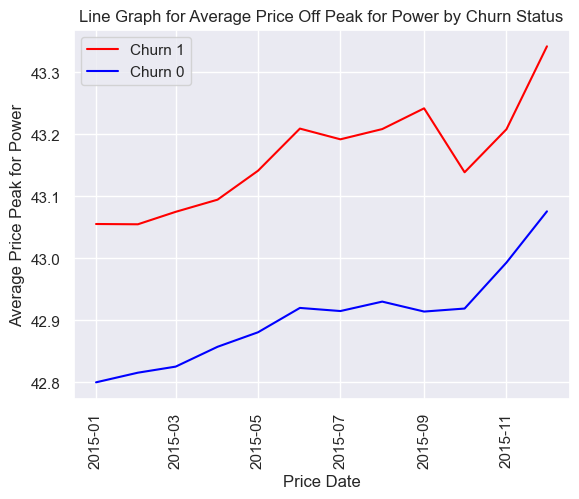

In [91]:
import pandas as pd
import matplotlib.pyplot as plt



# Group by 'price_date' and calculate the mean for 'price_off_peak_fix'
grouped_df = merged_data.groupby(['price_date', 'churn'])['price_off_peak_fix'].mean().reset_index()

# Filter the grouped DataFrame for churn 1 and 0
grouped_churn_1_df = grouped_df[grouped_df['churn'] == 1]
grouped_churn_0_df = grouped_df[grouped_df['churn'] == 0]

# Plotting line graph for 'price_off_peak_fix' after aggregation
plt.plot(grouped_churn_1_df['price_date'], grouped_churn_1_df['price_off_peak_fix'], label='Churn 1', color='red')
plt.plot(grouped_churn_0_df['price_date'], grouped_churn_0_df['price_off_peak_fix'], label='Churn 0', color='blue')

plt.xlabel('Price Date')
plt.ylabel('Average Price Peak for Power')
plt.title('Line Graph for Average Price Off Peak for Power by Churn Status')
plt.legend()
plt.xticks(rotation=90)
plt.show()

#### Inference: 

The average pricing during mid peak and peak period for energy and power almost follow a same pattern saying that they influence Customer churn, the prices are high for the churned customers(churn = 1) compared to retented ones(churn=0). Particularly, the off peak prices for energy and power between the months of January and December are significantly different, influencing Churn
Hence, the Power Co's customer churn is dependent on price sensitivity.

In [92]:
import pandas as pd

# Assuming your DataFrame is named df
# Selecting relevant columns for correlation analysis
selected_columns = [
    'churn', 'price_off_peak_var', 'price_peak_var', 'price_mid_peak_var',
    'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix'
]

# Create a new DataFrame with only the selected columns
selected_df = merged_data[selected_columns]

# Calculate the correlation matrix
correlation_matrix = selected_df.corr()

# Print or display the correlation matrix
correlation_matrix

,churn,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
churn,1.000000,-0.006075,0.029314,0.046120,0.016643,0.046852,0.044446
price_off_peak_var,-0.006075,1.000000,-0.328580,-0.594872,0.417097,-0.630018,-0.572229
price_peak_var,0.029314,-0.328580,1.000000,0.821353,-0.098627,0.796097,0.807759
price_mid_peak_var,0.046120,-0.594872,0.821353,1.000000,-0.137848,0.973960,0.979717
price_off_peak_fix,0.016643,0.417097,-0.098627,-0.137848,1.000000,-0.000428,-0.252661
price_peak_fix,0.046852,-0.630018,0.796097,0.973960,-0.000428,1.000000,0.927308
price_mid_peak_fix,0.044446,-0.572229,0.807759,0.979717,-0.252661,0.927308,1.000000


### Inference: To what extent does price sensitivity influence churn
- From the Correlation matrix above, negative correlations with variable off-peak prices suggest a slight tendency for clients to churn less often.
- Weak positive correlations with all fixed prices (0.016 to 0.047) suggest a slight tendency for clients to churn more often with fixed pricing, but the relationships are not strong.